In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pydot
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("J:/HiEnd/mlcourse_open-master/mlcourse_open-master/data/video_games_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


In [7]:
train_df = df[useful_cols]

In [8]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 10 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Rating             6825 non-null object
dtypes: float64(5), object(5)
memory usage: 586.5+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(train_df.Name.drop_duplicates()) #задаем список значений для кодирования
dicts['Name'] = list(label.classes_)
train_df.Name = label.transform(train_df.Name) #заменяем значения из списка кодами закодированных элементов 

label.fit(train_df.Platform.drop_duplicates())
dicts['Platfom'] = list(label.classes_)
train_df.Platform = label.transform(train_df.Platform)                               


In [11]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,4215,12,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,2087,12,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,4217,12,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,2567,2,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,4213,12,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(train_df.Genre.drop_duplicates())
dicts['Genre'] = list(label.classes_)
train_df.Genre = label.transform(train_df.Genre)
                                    
label.fit(train_df.Rating.drop_duplicates())
dicts['Rating'] = list(label.classes_)
train_df.Rating = label.transform(train_df.Rating)

In [13]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,4215,12,2006.0,10,82.53,76.0,51.0,8,322.0,1
2,2087,12,2008.0,6,35.52,82.0,73.0,8.3,709.0,1
3,4217,12,2009.0,10,32.77,80.0,73.0,8,192.0,1
6,2567,2,2006.0,4,29.80,89.0,65.0,8.5,431.0,1
7,4213,12,2006.0,3,28.92,58.0,41.0,6.6,129.0,1


In [16]:
target = df.Rating

train_df = train_df.drop(['Rating'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [18]:
X_train, X_holdout, y_train, y_holdout = train_test_split(train_df.values, target, test_size=0.3, random_state=17)

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [20]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [21]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.53173828125

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [25]:
%%time
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

Wall time: 1.57 s


In [26]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

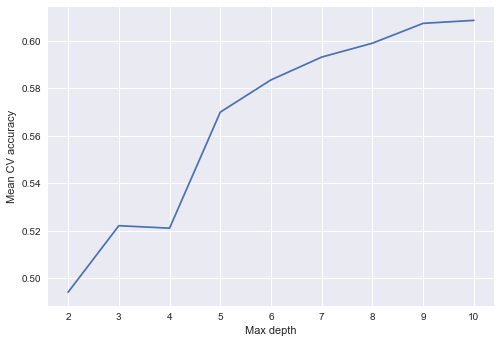

In [27]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [28]:
tree_grid.best_score_

0.6087502616705045

In [29]:
tree_grid.best_params_

{'max_depth': 10}

In [30]:
tree = DecisionTreeClassifier(max_depth=10, random_state=17)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [32]:
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.61865234375

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
random_tree = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42, n_jobs=3)

In [35]:
random_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=3, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [36]:
random_tree_pred = random_tree.predict(X_holdout)
accuracy_score(y_holdout, random_tree_pred)

0.56005859375

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=10)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [41]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.55712890625

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=3))])

In [44]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [45]:
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=5, n_jobs=3,verbose=True)

In [46]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   14.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [47]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.5212476449654595)